<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Dolly/Time_Series_Analysis_Amazon_Review_Analysis_(Sentiment_and_Emotion_Analysis)_Marketing_Mix_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')

def get_sentiment(text):
    """Determine sentiment polarity (-1 to 1)"""
    # Convert input to string if it's not already
    text = str(text)
    return TextBlob(text).sentiment.polarity

def classify_sentiment(score):
    """Convert polarity score to sentiment label"""
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Load dataset
df = pd.read_csv("/content/Reviews 500.csv")

# Ensure relevant text column exists
if 'Text' not in df.columns:
    raise ValueError("Column 'Text' not found in dataset")

# Compute sentiment scores
df['Sentiment Score'] = df['Text'].apply(get_sentiment)
df['Sentiment Label'] = df['Sentiment Score'].apply(classify_sentiment)

# Display analysis results
print(df[['Text', 'Sentiment Score', 'Sentiment Label']].head())

# Save results
df.to_csv("/content/Reviews 500.csv", index=False)
print("Sentiment analysis completed. Results saved.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-c286170fbb9f>:22: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Reviews 500.csv")


                                                Text  Sentiment Score  \
0  I have bought several of the Vitality canned d...         0.450000   
1  Product arrived labeled as Jumbo Salted Peanut...        -0.033333   
2  This is a confection that has been around a fe...         0.133571   
3  If you are looking for the secret ingredient i...         0.166667   
4  Great taffy at a great price.  There was a wid...         0.483333   

  Sentiment Label  
0        Positive  
1        Negative  
2        Positive  
3        Positive  
4        Positive  
Sentiment analysis completed. Results saved.


DEBUG:cmdstanpy:input tempfile: /tmp/tmposvibk5c/j5nclam7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmposvibk5c/0b8yonhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22375', 'data', 'file=/tmp/tmposvibk5c/j5nclam7.json', 'init=/tmp/tmposvibk5c/0b8yonhk.json', 'output', 'file=/tmp/tmposvibk5c/prophet_modelws8nfws7/prophet_model-20250209104026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


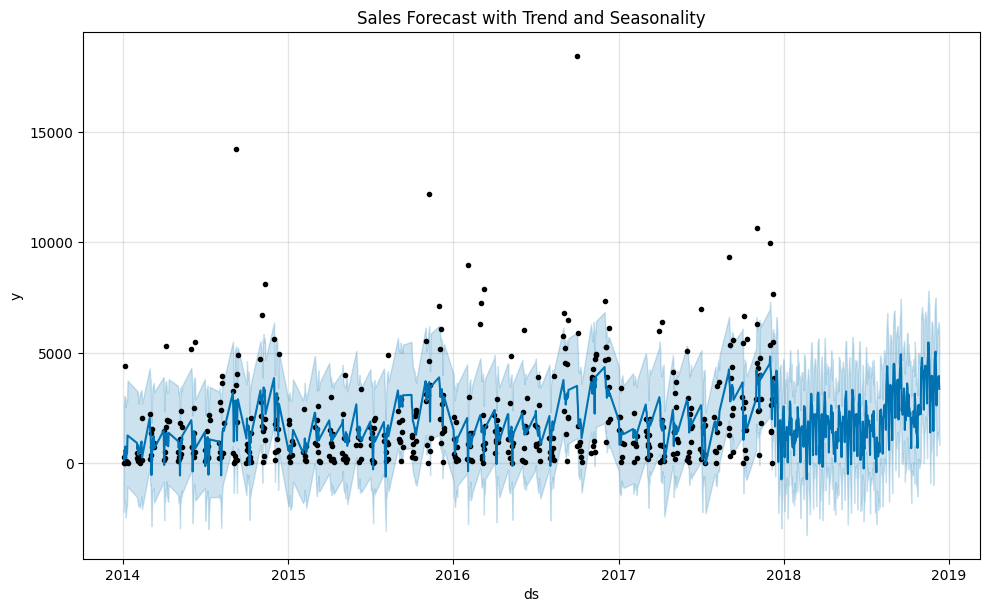

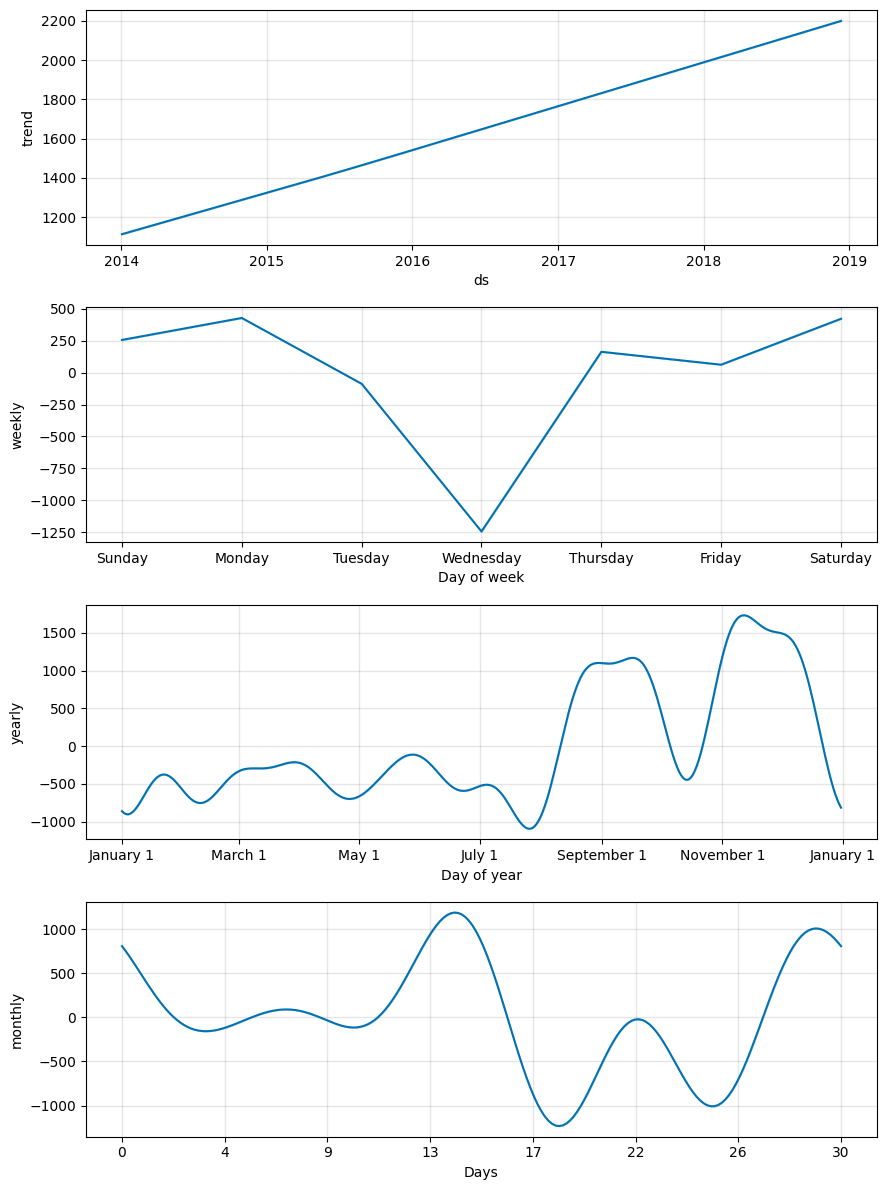

Weekly Forecast:
            ds          yhat    yhat_lower    yhat_upper
254 2018-11-18  30568.098673  13583.613072  47324.296515
255 2018-11-25  22816.929160   6312.121182  39907.274774
256 2018-12-02  24434.834092   7543.042379  41310.421079
257 2018-12-09  26647.226496   9925.682740  43283.267671
258 2018-12-16   7303.101445   2282.260941  12134.379143
Monthly Forecast:
           ds           yhat    yhat_lower     yhat_upper
55 2018-08-31   75150.509667     33.027787  150092.488947
56 2018-09-30   96265.605782  24304.983715  169207.669429
57 2018-10-31   68131.189232  -6449.209217  141368.062318
58 2018-11-30  112810.398300  40071.905944  185170.820012
59 2018-12-31   43524.370260  17122.114268   69830.919003
Yearly Forecast:
          ds           yhat     yhat_lower    yhat_upper
0 2014-12-31  166303.329244 -125278.658299  4.585706e+05
1 2015-12-31  197037.673617  -72355.913799  4.637638e+05
2 2016-12-31  242886.034284  -61454.866493  5.480509e+05
3 2017-12-31  319308.755323  -

<ipython-input-3-8036cf7a0dbc>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
<ipython-input-3-8036cf7a0dbc>:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()


In [3]:
import pandas as pd
import os
from prophet import Prophet
import matplotlib.pyplot as plt

# Suppress pandas Arrow string type warnings
pd.options.mode.string_storage = 'python'

# Sample data (assuming it's saved as 'sample_data.csv')
# Load the dataset with proper encoding to handle UnicodeDecodeError
try:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='utf-8')  # Replace with your actual file path
except UnicodeDecodeError:
    df = pd.read_csv('/content/Superstore - store analysis.csv', encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model with trend, seasonality, and holidays
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(daily_sales)

# Create future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast with Trend and Seasonality')
plt.show()

# Plot components (trend, yearly, weekly, monthly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Weekly forecast
weekly_forecast = forecast.set_index('ds').resample('W').sum().reset_index()
print("Weekly Forecast:")
print(weekly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Monthly forecast
monthly_forecast = forecast.set_index('ds').resample('M').sum().reset_index()
print("Monthly Forecast:")
print(monthly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Yearly forecast
yearly_forecast = forecast.set_index('ds').resample('Y').sum().reset_index()
print("Yearly Forecast:")
print(yearly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

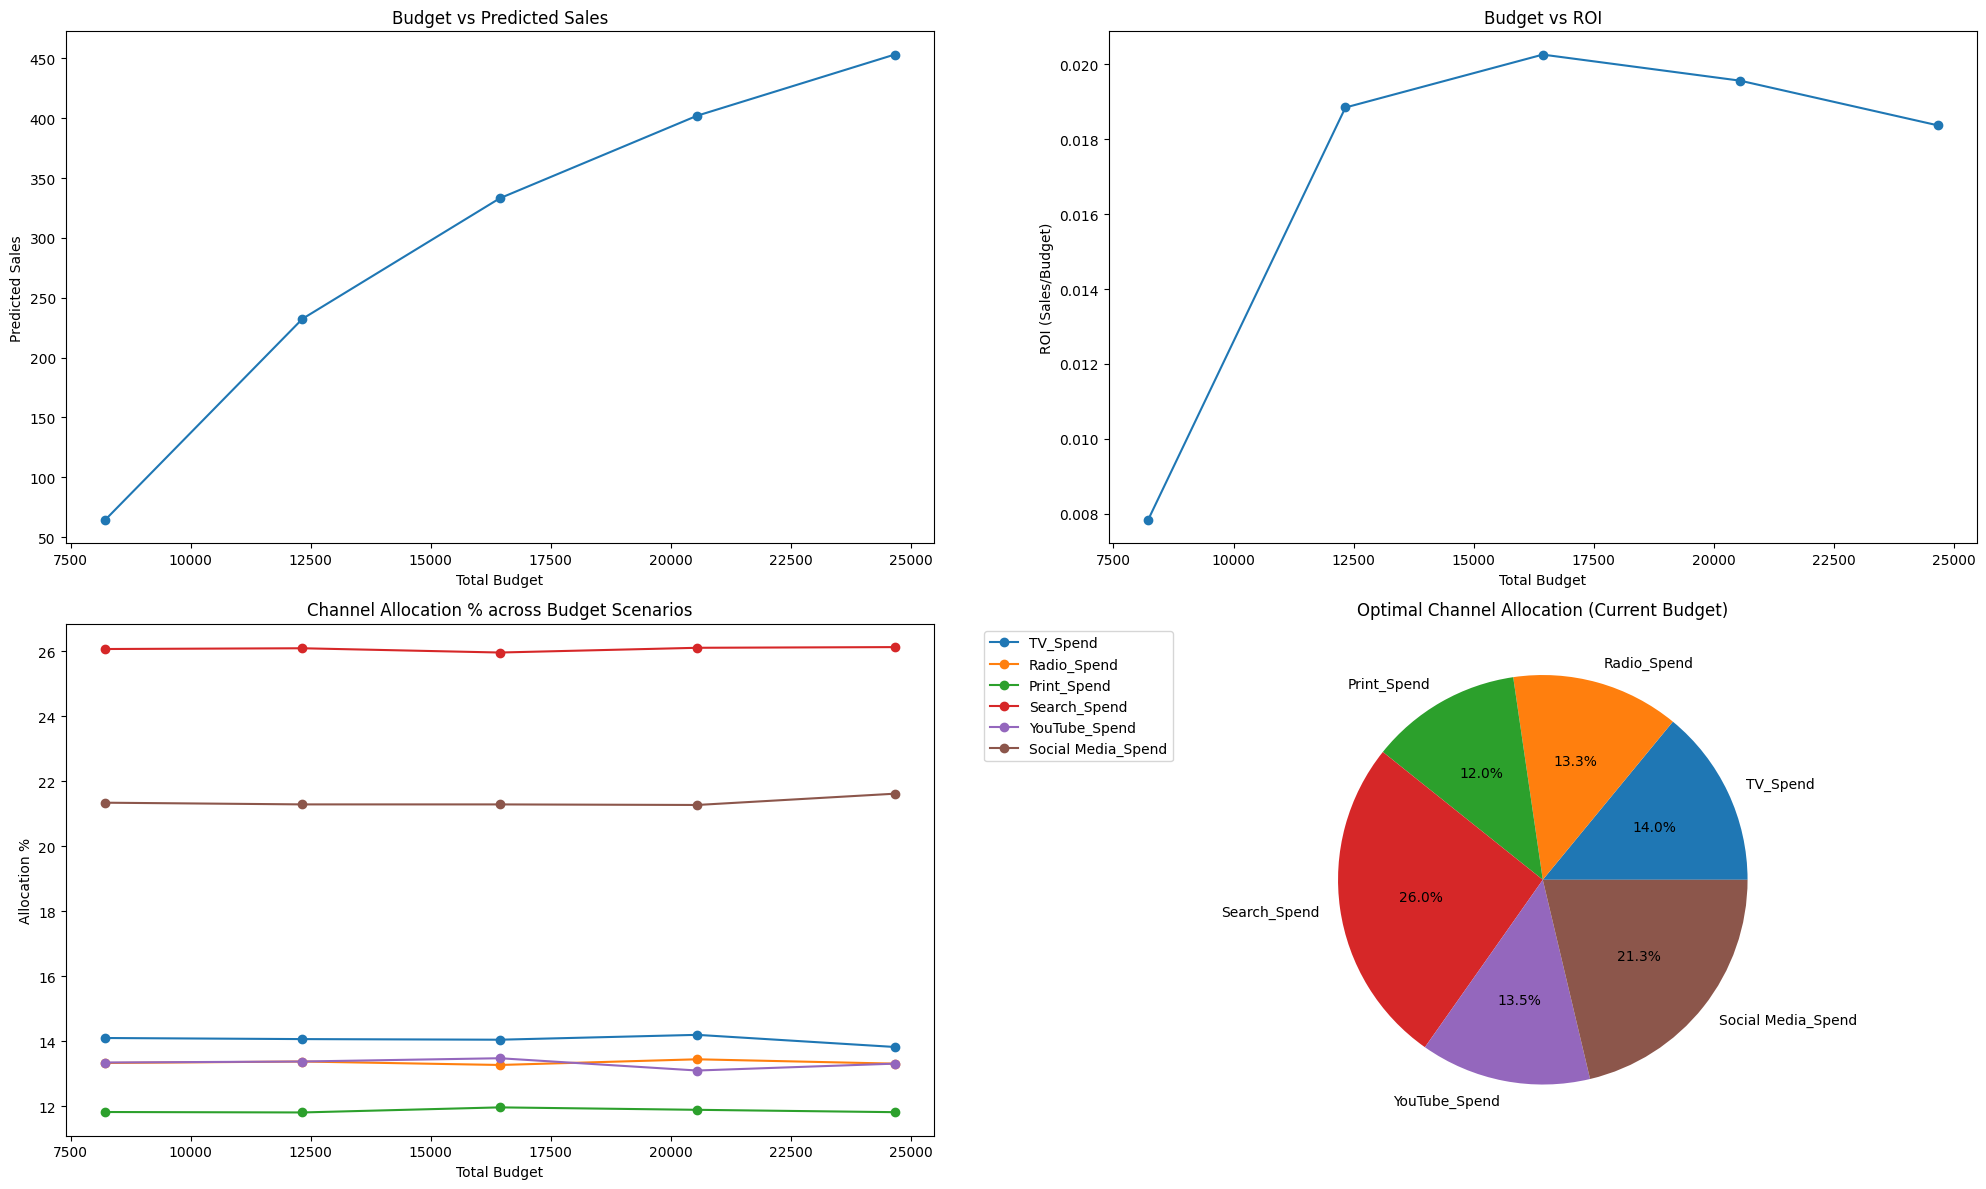


Optimization Results for Different Budget Scenarios:

Scenario 1 - Total Budget: $8,220.59
Predicted Sales: $64.39
ROI: 0.01

Channel Allocation:
TV_Spend: $1,158.80 (14.1%)
Radio_Spend: $1,095.52 (13.3%)
Print_Spend: $971.44 (11.8%)
Search_Spend: $2,143.57 (26.1%)
YouTube_Spend: $1,096.77 (13.3%)
Social Media_Spend: $1,754.50 (21.3%)
--------------------------------------------------

Scenario 2 - Total Budget: $12,330.89
Predicted Sales: $232.44
ROI: 0.02

Channel Allocation:
TV_Spend: $1,734.05 (14.1%)
Radio_Spend: $1,648.94 (13.4%)
Print_Spend: $1,455.48 (11.8%)
Search_Spend: $3,218.21 (26.1%)
YouTube_Spend: $1,648.92 (13.4%)
Social Media_Spend: $2,625.29 (21.3%)
--------------------------------------------------

Scenario 3 - Total Budget: $16,441.19
Predicted Sales: $333.16
ROI: 0.02

Channel Allocation:
TV_Spend: $2,308.96 (14.0%)
Radio_Spend: $2,181.06 (13.3%)
Print_Spend: $1,966.36 (12.0%)
Search_Spend: $4,269.37 (26.0%)
YouTube_Spend: $2,215.14 (13.5%)
Social Media_Spend: $3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('/content/MMM brand data.csv')

# Define adstock transformation function
def adstock_transform(x, decay_rate):
    result = [x[0]]
    for i in range(1, len(x)):
        result.append(x[i] + decay_rate * result[i-1])
    return np.array(result)

# Define saturation transformation function (Hill function)
def saturation_transform(x, k, s):
    return x**s / (k**s + x**s)

# Initialize parameters
channels = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
decay_rates = {channel: 0.3 for channel in channels}
k_values = {channel: 0.5 for channel in channels}
s_values = {channel: 0.5 for channel in channels}

# Apply transformations
df_transformed = df.copy()
for channel in channels:
    df_transformed[f'{channel}_adstock'] = adstock_transform(df[channel].values, decay_rates[channel])
    df_transformed[f'{channel}_final'] = saturation_transform(
        df_transformed[f'{channel}_adstock'],
        k_values[channel],
        s_values[channel]
    )

# Prepare data for modeling
X = df_transformed[[f'{channel}_final' for channel in channels]]
y = df['Sales']
X['Promotion'] = df['Promotion']

# Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Function to predict sales given spend
def predict_sales(spend_dict, promotion=0):
    transformed_spends = {}
    for channel in channels:
        adstock = adstock_transform(np.array([spend_dict[channel]]), decay_rates[channel])[0]
        transformed_spends[channel] = saturation_transform(adstock, k_values[channel], s_values[channel])

    X_pred = np.array([transformed_spends[channel] for channel in channels] + [promotion])
    return model.predict(X_pred.reshape(1, -1))[0]

# Optimization function for a given budget
def optimize_budget(total_budget):
    def objective_function(spend_vector):
        spend_dict = {channel: spend for channel, spend in zip(channels, spend_vector)}
        return -predict_sales(spend_dict)  # Negative because we're minimizing

    constraints = [
        {'type': 'eq', 'fun': lambda x: sum(x) - total_budget}  # Budget constraint
    ]
    bounds = [(0, total_budget) for _ in channels]  # Can't spend negative or more than budget

    initial_guess = np.array([total_budget/len(channels) for _ in channels])
    result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x, -result.fun  # Return optimal allocation and predicted sales

# Current total budget
current_budget = df[channels].sum().sum() / len(df)

# Generate different budget scenarios
budget_scenarios = np.linspace(current_budget * 0.5, current_budget * 1.5, 5)
optimization_results = []

for budget in budget_scenarios:
    allocation, predicted_sales = optimize_budget(budget)
    optimization_results.append({
        'Budget': budget,
        'Predicted_Sales': predicted_sales,
        'ROI': predicted_sales / budget,
        'Allocation': dict(zip(channels, allocation))
    })

# Convert results to DataFrame
results_df = pd.DataFrame(optimization_results)

# Visualizations
plt.figure(figsize=(20, 12))

# 1. Budget vs Sales
plt.subplot(2, 2, 1)
plt.plot(results_df['Budget'], results_df['Predicted_Sales'], marker='o')
plt.title('Budget vs Predicted Sales')
plt.xlabel('Total Budget')
plt.ylabel('Predicted Sales')

# 2. Budget vs ROI
plt.subplot(2, 2, 2)
plt.plot(results_df['Budget'], results_df['ROI'], marker='o')
plt.title('Budget vs ROI')
plt.xlabel('Total Budget')
plt.ylabel('ROI (Sales/Budget)')

# 3. Channel Allocation across Budgets
plt.subplot(2, 2, 3)
channel_allocations = pd.DataFrame([res['Allocation'] for res in optimization_results])
channel_allocations_pct = channel_allocations.div(channel_allocations.sum(axis=1), axis=0) * 100

for channel in channels:
    plt.plot(budget_scenarios, channel_allocations_pct[channel], marker='o', label=channel)
plt.title('Channel Allocation % across Budget Scenarios')
plt.xlabel('Total Budget')
plt.ylabel('Allocation %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Optimal Allocation for Current Budget
plt.subplot(2, 2, 4)
current_allocation = channel_allocations.iloc[2]  # Middle scenario (current budget)
plt.pie(current_allocation, labels=channels, autopct='%1.1f%%')
plt.title('Optimal Channel Allocation (Current Budget)')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nOptimization Results for Different Budget Scenarios:")
for i, result in enumerate(optimization_results):
    print(f"\nScenario {i+1} - Total Budget: ${result['Budget']:,.2f}")
    print(f"Predicted Sales: ${result['Predicted_Sales']:,.2f}")
    print(f"ROI: {result['ROI']:.2f}")
    print("\nChannel Allocation:")
    for channel, amount in result['Allocation'].items():
        print(f"{channel}: ${amount:,.2f} ({amount/result['Budget']*100:.1f}%)")
    print("-" * 50)

# Calculate and print marginal returns
print("\nMarginal Returns Analysis:")
for i in range(1, len(optimization_results)):
    budget_increase = results_df['Budget'].iloc[i] - results_df['Budget'].iloc[i-1]
    sales_increase = results_df['Predicted_Sales'].iloc[i] - results_df['Predicted_Sales'].iloc[i-1]
    marginal_roi = sales_increase / budget_increase
    print(f"\nBudget Increase: ${budget_increase:,.2f}")
    print(f"Sales Increase: ${sales_increase:,.2f}")
    print(f"Marginal ROI: {marginal_roi:.2f}")